# Capstone Poject
## import data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
import scipy.stats as st

In [2]:

zip_file = "zippedData/im.db.zip"

try:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall("zippedData/unZippedim.db")
        print("Extracted all")
except:
    print("Invalid file")


Extracted all


In [3]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

conn = sqlite3.connect("zippedData/unZippedim.db/im.db")


# Movie Budgets

In [4]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype("float64")

In [6]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',','')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')

movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype("float64")

In [7]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')

movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype("float64")

In [8]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


# Movie Gross

In [9]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')
movie_gross['foreign_gross'] = movie_gross["foreign_gross"].astype("float64")

In [11]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


# Movie Info

### original data

In [12]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [13]:
movie_info['runtime'] = movie_info['runtime'].str.replace(' minutes','')
movie_info['runtime']  = movie_info['runtime'].astype("float64")

In [14]:
movie_info['box_office'] = movie_info['box_office'].str.replace(',','')
movie_info['box_office'] = movie_info['box_office'].astype("float64")

In [15]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    float64
 10  runtime       1530 non-null   float64
 11  studio        494 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 146.4+ KB


In [16]:
movie_info['theater_date']= pd.to_datetime(movie_info['theater_date'])
movie_info['theater_date'].dt.strftime('%m %d %Y')


0       10 09 1971
1       08 17 2012
2       09 13 1996
3       12 09 1994
4              NaN
           ...    
1555    08 18 2006
1556    07 23 1993
1557    01 01 1962
1558    04 01 1993
1559    09 27 2001
Name: theater_date, Length: 1560, dtype: object

In [17]:
theater_month = movie_info['theater_date'].dt.strftime('%m')
movie_info['Theater_month']= theater_month
movie_info
                                        


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,Theater_month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104.0,NaN,10
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108.0,Entertainment One,08
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116.0,NaN,09
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128.0,NaN,12
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,"Jan 2, 2007",$,33886034.0,106.0,New Line Cinema,08
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",NaN,NaN,88.0,Paramount Vantage,07
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,"May 11, 2004",NaN,NaN,111.0,NaN,01
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,"Jan 29, 2002",NaN,NaN,101.0,NaN,04


In [18]:
theater_year = movie_info['theater_date'].dt.strftime('%Y')
movie_info['Theater_year']= theater_year
movie_info
                                 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,Theater_month,Theater_year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104.0,NaN,10,1971
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108.0,Entertainment One,08,2012
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116.0,NaN,09,1996
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128.0,NaN,12,1994
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,"Jan 2, 2007",$,33886034.0,106.0,New Line Cinema,08,2006
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",NaN,NaN,88.0,Paramount Vantage,07,1993
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,"May 11, 2004",NaN,NaN,111.0,NaN,01,1962
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,"Jan 29, 2002",NaN,NaN,101.0,NaN,04,1993


In [19]:
movie_info = movie_info.dropna(subset=['Theater_month'])
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,Theater_month,Theater_year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104.0,NaN,10,1971
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108.0,Entertainment One,08,2012
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116.0,NaN,09,1996
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128.0,NaN,12,1994
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,"Jul 11, 2000",NaN,NaN,95.0,Warner Bros. Pictures,03,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,"Jan 2, 2007",$,33886034.0,106.0,New Line Cinema,08,2006
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",NaN,NaN,88.0,Paramount Vantage,07,1993
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,"May 11, 2004",NaN,NaN,111.0,NaN,01,1962
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,"Jan 29, 2002",NaN,NaN,101.0,NaN,04,1993


In [20]:
#Season: spring = 1, summer=2, fall= 3, winter=4
season_dict = {'01': '4',
               '02': '4',
               '03': '1', 
               '04': '1',
               '05': '1',
               '06': '2',
               '07': '2',
               '08': '2',
               '09': '3',
               '10': '3',
               '11': '3',
               '12': '4'}
movie_info['Season'] = movie_info['Theater_month'].apply(lambda x: season_dict[x])

<ipython-input-20-054f938cda6d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['Season'] = movie_info['Theater_month'].apply(lambda x: season_dict[x])


In [21]:
movie_info['Theater_year']  = movie_info['Theater_year'].astype("int")
movie_info['Theater_month']  = movie_info['Theater_month'].astype("int")
movie_info['Season']  = movie_info['Season'].astype("int")

<ipython-input-21-72ea73207169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['Theater_year']  = movie_info['Theater_year'].astype("int")
<ipython-input-21-72ea73207169>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['Theater_month']  = movie_info['Theater_month'].astype("int")
<ipython-input-21-72ea73207169>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [22]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1201 non-null   int64         
 1   synopsis       1198 non-null   object        
 2   rating         1201 non-null   object        
 3   genre          1201 non-null   object        
 4   director       1083 non-null   object        
 5   writer         938 non-null    object        
 6   theater_date   1201 non-null   datetime64[ns]
 7   dvd_date       1201 non-null   object        
 8   currency       334 non-null    object        
 9   box_office     334 non-null    float64       
 10  runtime        1194 non-null   float64       
 11  studio         464 non-null    object        
 12  Theater_month  1201 non-null   int32         
 13  Theater_year   1201 non-null   int32         
 14  Season         1201 non-null   int32         
dtypes: datetime64[ns](1),

#### Movie Info with seasonal data 

In [23]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,Theater_month,Theater_year,Season
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104.0,NaN,10,1971,3
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108.0,Entertainment One,8,2012,2
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116.0,NaN,9,1996,3
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128.0,NaN,12,1994,4
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,"Jul 11, 2000",NaN,NaN,95.0,Warner Bros. Pictures,3,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,"Jan 2, 2007",$,33886034.0,106.0,New Line Cinema,8,2006,2
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,"Apr 17, 2001",NaN,NaN,88.0,Paramount Vantage,7,1993,2
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,"May 11, 2004",NaN,NaN,111.0,NaN,1,1962,4
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,"Jan 29, 2002",NaN,NaN,101.0,NaN,4,1993,1


# Movies 

In [24]:
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
#genre ID's relate to type of movie genre. (example: 1:action movie, 2:commedy)
# could be helpful in finding corretion and calculations

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Reviews

In [27]:
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [28]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


# Merg Gross with movie info

In [29]:
movie_info.rename(columns={'Theater_year':'year'}, inplace = True)
movieGrossJoinInfo = pd.DataFrame.merge(movie_gross, movie_info, on = 'year')
movieGrossJoinInfo

C:\Users\aldonahue\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,title,studio_x,domestic_gross,foreign_gross,year,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio_y,Theater_month,Season
0,Toy Story 3,BV,415000000.0,652000000.0,2010,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,134904.0,117.0,NaN,6,2
1,Toy Story 3,BV,415000000.0,652000000.0,2010,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,1039869.0,108.0,ATO Pictures,12,4
2,Toy Story 3,BV,415000000.0,652000000.0,2010,87,"""Mao's Last Dancer"" is the inspiring true stor...",PG,Art House and International|Drama|Musical and ...,Bruce Beresford,Jan Sardi,2010-08-20,"May 3, 2011",$,4806750.0,117.0,Samuel Goldwyn Films,8,2
3,Toy Story 3,BV,415000000.0,652000000.0,2010,108,A picture-perfect family moves into an upscale...,R,Comedy|Drama|Kids and Family,Derrick Borte,Derrick Borte,2010-04-16,"Aug 10, 2010",$,1000000.0,93.0,Roadside Attractions,4,1
4,Toy Story 3,BV,415000000.0,652000000.0,2010,136,"In CASE 39, family services social worker Emil...",R,Horror|Mystery and Suspense,Christian Alvart,Ray Wright,2010-10-01,"Jan 4, 2011",$,13248477.0,109.0,Paramount Studios,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76429,An Actor Prepares,Grav.,1700.0,NaN,2018,1657,Famed action director Dante Lam returns with t...,NR,Action and Adventure,Dante Lam,Ji Feng,2018-02-23,"Jul 24, 2018",$,1526248.0,141.0,NaN,2,4
76430,An Actor Prepares,Grav.,1700.0,NaN,2018,1682,"In the early evening of August 21, 2015, the w...",PG-13,Drama,Clint Eastwood,Dorothy Blyskal,2018-02-09,"May 22, 2018",$,35003216.0,120.0,NaN,2,4
76431,An Actor Prepares,Grav.,1700.0,NaN,2018,1819,"In the year 2045, people can escape their hars...",PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Zak Penn|Ernest Cline,2018-03-29,"Jul 3, 2018",NaN,NaN,140.0,Warner Bros. Pictures,3,1
76432,An Actor Prepares,Grav.,1700.0,NaN,2018,1845,A group of wealthy boys in Los Angeles during ...,R,Drama|Mystery and Suspense,James Cox,Captain Mauzner|James Cox,2018-08-17,"Sep 18, 2018",NaN,NaN,100.0,NaN,8,2


In [30]:
movieGrossJoinInfo.fillna(0, inplace = True)

In [31]:
movieGrossJoinInfo.isna().sum()

title             0
studio_x          0
domestic_gross    0
foreign_gross     0
year              0
id                0
synopsis          0
rating            0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
currency          0
box_office        0
runtime           0
studio_y          0
Theater_month     0
Season            0
dtype: int64

In [32]:
movieGrossJoinInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76434 entries, 0 to 76433
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           76434 non-null  object        
 1   studio_x        76434 non-null  object        
 2   domestic_gross  76434 non-null  float64       
 3   foreign_gross   76434 non-null  float64       
 4   year            76434 non-null  int64         
 5   id              76434 non-null  int64         
 6   synopsis        76434 non-null  object        
 7   rating          76434 non-null  object        
 8   genre           76434 non-null  object        
 9   director        76434 non-null  object        
 10  writer          76434 non-null  object        
 11  theater_date    76434 non-null  datetime64[ns]
 12  dvd_date        76434 non-null  object        
 13  currency        76434 non-null  object        
 14  box_office      76434 non-null  float64       
 15  ru

In [33]:
holder = movieGrossJoinInfo.groupby('Season').sum()
holder


,domestic_gross,foreign_gross,year,id,box_office,runtime,Theater_month
Season,,,,,,,
1,5.441235e+11,8.464525e+11,37920640,16755441,4.122203e+11,1921637.0,76441
2,6.074194e+11,9.531638e+11,41853667,20080711,2.993391e+11,2153131.0,150203
3,4.751633e+11,7.312054e+11,34390157,18860378,3.019208e+11,1752121.0,174439
4,5.571610e+11,8.669814e+11,39750460,20877450,4.892092e+11,2076558.0,103607


In [34]:
holder.drop(['year', 'id', 'box_office', 'runtime', 'Theater_month'], axis=1, inplace=True)
holder

,domestic_gross,foreign_gross
Season,,
1,5.441235e+11,8.464525e+11
2,6.074194e+11,9.531638e+11
3,4.751633e+11,7.312054e+11
4,5.571610e+11,8.669814e+11


In [35]:
holder.info

<bound method DataFrame.info of         domestic_gross  foreign_gross
Season                               
1         5.441235e+11   8.464525e+11
2         6.074194e+11   9.531638e+11
3         4.751633e+11   7.312054e+11
4         5.571610e+11   8.669814e+11>

# Movie Budget Adjustments 

In [36]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [37]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [38]:
movie_budgets['release_date']= pd.to_datetime(movie_budgets['release_date'])
movie_budgets['release_date'].dt.strftime('%m %d %Y')

0       12 18 2009
1       05 20 2011
2       06 07 2019
3       05 01 2015
4       12 15 2017
           ...    
5777    12 31 2018
5778    04 02 1999
5779    07 13 2005
5780    09 29 2015
5781    08 05 2005
Name: release_date, Length: 5782, dtype: object

In [39]:
release_month = movie_budgets['release_date'].dt.strftime('%m')
movie_budgets['release_month']= release_month
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,05
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,06
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,05
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,04
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,07
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,09


In [40]:
release_year = movie_budgets['release_date'].dt.strftime('%Y')
movie_budgets['release_year']= release_year
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,05,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,06,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,05,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12,2018
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,04,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,07,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,09,2015


In [41]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_month        0
release_year         0
dtype: int64

In [42]:
#Season: spring = 1, summer=2, fall= 3, winter=4
season_dict = {'01': '4',
               '02': '4',
               '03': '1', 
               '04': '1',
               '05': '1',
               '06': '2',
               '07': '2',
               '08': '2',
               '09': '3',
               '10': '3',
               '11': '3',
               '12': '4'}
movie_budgets['Season'] = movie_budgets['release_month'].apply(lambda x: season_dict[x])

In [43]:
movie_budgets['release_year']  = movie_budgets['release_year'].astype("int")
movie_budgets['release_month']  = movie_budgets['release_month'].astype("int")
movie_budgets['Season']  = movie_budgets['Season'].astype("int")

In [44]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   int32         
 7   release_year       5782 non-null   int32         
 8   Season             5782 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(1)
memory usage: 338.9+ KB


In [45]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,Season
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,1
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,2
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,4
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12,2018,4
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,4,1999,1
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,7,2005,2
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,9,2015,3


In [46]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_month      5782 non-null   int32         
 7   release_year       5782 non-null   int32         
 8   Season             5782 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(1)
memory usage: 338.9+ KB


## movie budgets with seasonal data

In [47]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,Season
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,1
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,2
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,1
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,4
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,12,2018,4
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,4,1999,1
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,7,2005,2
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,9,2015,3


# Merg Gross and budgets

In [48]:
movie_budgets.rename(columns={'movie':'title'}, inplace = True)
movieGrossJoinBudgets = pd.DataFrame.merge(movie_gross, movie_budgets, on = 'title')
movieGrossJoinBudgets

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,release_month,release_year,Season
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,2010-06-18,200000000.0,415004880.0,1.068880e+09,6,2010,2
1,Inception,WB,292600000.0,535700000.0,2010,38,2010-07-16,160000000.0,292576195.0,8.355246e+08,7,2010,2
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,2010-05-21,165000000.0,238736787.0,7.562447e+08,5,2010,1
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,2010-06-30,68000000.0,300531751.0,7.061028e+08,6,2010,2
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,2010-05-07,170000000.0,312433331.0,6.211564e+08,5,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,2018-06-15,10000000.0,4286367.0,6.089100e+06,6,2018,2
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,2018-12-07,13000000.0,3703182.0,9.633111e+06,12,2018,4
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,100,2018-02-02,30000000.0,490973.0,6.485990e+05,2,2018,4
1245,Mandy,RLJ,1200000.0,NaN,2018,71,2018-09-14,6000000.0,1214525.0,1.427656e+06,9,2018,3


In [49]:
movieGrossJoinBudgets.isna().sum()

title                  0
studio                 1
domestic_gross_x       2
foreign_gross        161
year                   0
id                     0
release_date           0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
release_month          0
release_year           0
Season                 0
dtype: int64

In [50]:
movieGrossJoinBudgets.fillna(0, inplace = True)

In [51]:
movieGrossJoinBudgets.isna().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
release_month        0
release_year         0
Season               0
dtype: int64

In [52]:
movieGrossJoinBudgets.drop(['domestic_gross_y'], axis=1, inplace=True)
movieGrossJoinBudgets

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,worldwide_gross,release_month,release_year,Season
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,2010-06-18,200000000.0,1.068880e+09,6,2010,2
1,Inception,WB,292600000.0,535700000.0,2010,38,2010-07-16,160000000.0,8.355246e+08,7,2010,2
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,2010-05-21,165000000.0,7.562447e+08,5,2010,1
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,2010-06-30,68000000.0,7.061028e+08,6,2010,2
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,2010-05-07,170000000.0,6.211564e+08,5,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,0.0,2018,64,2018-06-15,10000000.0,6.089100e+06,6,2018,2
1243,Ben is Back,RAtt.,3700000.0,0.0,2018,95,2018-12-07,13000000.0,9.633111e+06,12,2018,4
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,100,2018-02-02,30000000.0,6.485990e+05,2,2018,4
1245,Mandy,RLJ,1200000.0,0.0,2018,71,2018-09-14,6000000.0,1.427656e+06,9,2018,3


In [53]:
movieGrossJoinBudgets.isna().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
production_budget    0
worldwide_gross      0
release_month        0
release_year         0
Season               0
dtype: int64

In [54]:
movieGrossJoinBudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1247 non-null   object        
 1   studio             1247 non-null   object        
 2   domestic_gross_x   1247 non-null   float64       
 3   foreign_gross      1247 non-null   float64       
 4   year               1247 non-null   int64         
 5   id                 1247 non-null   int64         
 6   release_date       1247 non-null   datetime64[ns]
 7   production_budget  1247 non-null   float64       
 8   worldwide_gross    1247 non-null   float64       
 9   release_month      1247 non-null   int32         
 10  release_year       1247 non-null   int32         
 11  Season             1247 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2), object(2)
memory usage: 112.0+ KB


In [55]:
holder = movieGrossJoinBudgets.groupby('Season').sum()
holder

,domestic_gross_x,foreign_gross,year,id,production_budget,worldwide_gross,release_month,release_year
Season,,,,,,,,
1,1.719461e+10,2.450475e+10,589923,14302,1.499204e+10,4.555222e+10,1153,589880
2,2.418935e+10,3.519217e+10,634297,16508,1.716946e+10,6.058241e+10,2199,634204
3,1.731912e+10,2.663592e+10,714763,17629,1.399494e+10,4.386285e+10,3566,714704
4,1.677322e+10,2.289063e+10,571916,15057,1.244522e+10,3.970351e+10,1643,571924


In [56]:
holder.drop(['year', 'id', 'production_budget', 'worldwide_gross', 'release_month', 'release_year'], axis=1, inplace=True)
holder

,domestic_gross_x,foreign_gross
Season,,
1,1.719461e+10,2.450475e+10
2,2.418935e+10,3.519217e+10
3,1.731912e+10,2.663592e+10
4,1.677322e+10,2.289063e+10


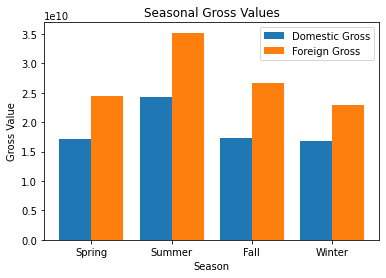

In [57]:
w=0.4
x = ['Spring', 'Summer', 'Fall', 'Winter']
domestic_gross_x = [1.719461e+10, 2.418935e+10, 1.731912e+10, 1.677322e+10]
foreign_gross = [2.450475e+10, 3.519217e+10, 2.663592e+10, 2.289063e+10]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,domestic_gross_x,w,label='Domestic Gross')
plt.bar(bar2,foreign_gross,w,label='Foreign Gross')
plt.title('Seasonal Gross Values')
plt.xticks(bar1+w/2,x)
plt.xlabel('Season')
plt.ylabel('Gross Value')
plt.legend()
plt.show()

In [80]:
movieGrossJoinBudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1247 non-null   object        
 1   studio             1247 non-null   object        
 2   domestic_gross_x   1247 non-null   float64       
 3   foreign_gross      1247 non-null   float64       
 4   year               1247 non-null   int64         
 5   id                 1247 non-null   int64         
 6   release_date       1247 non-null   datetime64[ns]
 7   production_budget  1247 non-null   float64       
 8   worldwide_gross    1247 non-null   float64       
 9   release_month      1247 non-null   int32         
 10  release_year       1247 non-null   int32         
 11  Season             1247 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(2), object(2)
memory usage: 112.0+ KB


# Hyptheses Testing

### Hyptheses

In [90]:
"""
Null: There is no significant difference between the summer release dates and non summer release dates. H0:𝜇 ≥ 𝑥¯  
Alternative: The the gross value is significantly bigger when released than not released in summer mean. 𝐻𝑎: 𝜇<𝑥¯
Alpha= .02
"""

'\nNull: There is no significant difference between the summer release dates and non summer release dates. H0:𝜇 ≥ 𝑥¯  \nAlternative: The the gross value is significantly bigger when released than not released in summer mean. 𝐻𝑎: 𝜇<𝑥¯\nAlpha= .02\n'

#### We will be preforming a

{'whiskers': [<matplotlib.lines.Line2D at 0x219ef91a550>,
 'caps': [<matplotlib.lines.Line2D at 0x219ef91ac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x219ef91a1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x219efa66340>,
 'fliers': [<matplotlib.lines.Line2D at 0x219efa666a0>,
 'means': []}

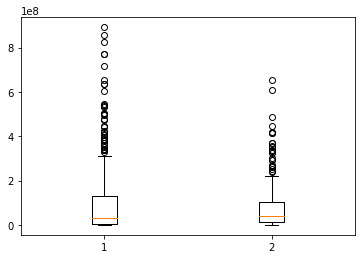

In [81]:
summer = movieGrossJoinBudgets['Season'].values == 2
s1 = movieGrossJoinBudgets.loc[summer]['foreign_gross']
s2 = movieGrossJoinBudgets.loc[summer]['domestic_gross_x']
plt.boxplot([s1, s2])

In [82]:
s1

0       652000000.0
1       535700000.0
3       398000000.0
6       291600000.0
9       182500000.0
           ...     
1231      6300000.0
1232      2400000.0
1236      6000000.0
1237      4300000.0
1242            0.0
Name: foreign_gross, Length: 315, dtype: float64

In [83]:
s2

0       415000000.0
1       292600000.0
3       300500000.0
6       251500000.0
9       176600000.0
           ...     
1231      8900000.0
1232     12000000.0
1236      6700000.0
1237      5700000.0
1242      4300000.0
Name: domestic_gross_x, Length: 315, dtype: float64

In [87]:
# T-test for foriegn market in summer
st.ttest_1samp(s1, popmean = movieGrossJoinBudgets['foreign_gross'].mean())

Ttest_1sampResult(statistic=2.4740737275416476, pvalue=0.013886511190337212)

In [88]:
#T-test for domestic market for summer
st.ttest_1samp(s2, popmean = movieGrossJoinBudgets['domestic_gross_x'].mean())

Ttest_1sampResult(statistic=2.863000830870684, pvalue=0.004478690106275518)

#  Decsision

In [94]:
"""
Since pvalue both pvalue for foreign and domestic gross are less than an alpha = .02 we can succesfully reject the null.
Stating that we are 98% sure that movies released in the Summer will result in larger gross profits.
"""

'\nSince pvalue both pvalue for foreign and domestic gross are less than an alpha = .02 we can succesfully reject the null.\nStating that we are 98% sure that movies released in the Summer will result in larger gross profits.\n'